In [43]:
import keras

In [44]:
from keras.datasets import  mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import  np_utils
import matplotlib.pyplot as plt

In [45]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

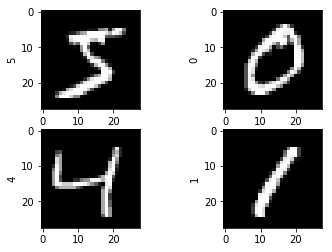

In [46]:
plt.subplot (221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.ylabel(y_train[0])

plt.subplot (222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.ylabel(y_train[1])

plt.subplot (223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.ylabel(y_train[2])

plt.subplot (224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.ylabel(y_train[3])

plt.show()

In [7]:
import numpy as np
seed = 7
np.random.seed(seed)

In [8]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_pixels

784

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


In [17]:
X_train = X_train/255
X_test = X_test/255

In [20]:
# one hot encoder output

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
num_classes

10

In [26]:
# bases line models

def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim = num_pixels, kernel_initializer='normal', activation= 'relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation= 'softmax'))
    # complile model
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [27]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.2736 - acc: 0.9218 - val_loss: 0.1386 - val_acc: 0.9593
Epoch 2/10
 - 9s - loss: 0.1096 - acc: 0.9680 - val_loss: 0.0942 - val_acc: 0.9714
Epoch 3/10
 - 10s - loss: 0.0695 - acc: 0.9801 - val_loss: 0.0791 - val_acc: 0.9754
Epoch 4/10
 - 9s - loss: 0.0485 - acc: 0.9865 - val_loss: 0.0655 - val_acc: 0.9789
Epoch 5/10
 - 9s - loss: 0.0348 - acc: 0.9901 - val_loss: 0.0634 - val_acc: 0.9800
Epoch 6/10
 - 9s - loss: 0.0256 - acc: 0.9927 - val_loss: 0.0614 - val_acc: 0.9815
Epoch 7/10
 - 9s - loss: 0.0179 - acc: 0.9958 - val_loss: 0.0585 - val_acc: 0.9824
Epoch 8/10
 - 9s - loss: 0.0129 - acc: 0.9972 - val_loss: 0.0577 - val_acc: 0.9825
Epoch 9/10
 - 9s - loss: 0.0096 - acc: 0.9983 - val_loss: 0.0615 - val_acc: 0.9817
Epoch 10/10
 - 9s - loss: 0.0079 - acc: 0.9984 - val_loss: 0.0590 - val_acc: 0.9823
Baseline Error: 1.77%


In [58]:
y_0 = model.predict(X_train[0].reshape(1,784))
#help(model.predict)

In [59]:
np.argmax(y_0)

5

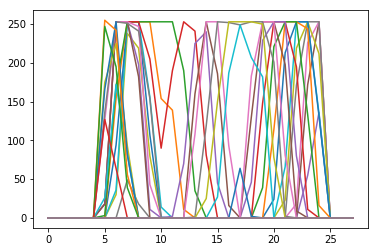

In [61]:
plt.plot(X_train[0].reshape(28,28))
plt.show()